In [ ]:
!pip install -r requirements.txt

In [ ]:
!python -m visdom.server -port 8098

In [1]:
!start http://localhost:8098/

Training the model MFCGAN, here we penalize the gradient of the generator with lambda_GA = 2e-2

In [2]:
!python train.py --dataroot ./datasets/involute/ --name involute_pen_grad_20 --lambda_GA 2e-2 --n_epochs_decay 400 --n_epochs 100 --display_port 8098

----------------- Options ---------------
               batch_size: 32                            
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/involute/          	[default: None]
             dataset_mode: vec                           
                direction: AtoB                          
              display_env: main                          
             display_freq: 0                             
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8098                          	[default: 8097]
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                       

c:\Users\51004\Anaconda3\envs\GPU\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Setting up a new session...
c:\Users\51004\Anaconda3\envs\GPU\lib\site-packages\torch\optim\lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "



(epoch: 63, iters: 5408, time: 0.007, data: 0.000) D_A: 0.004 G_A: 1.377 cycle_A: 0.005 idt_A: 0.000 D_B: 0.250 G_B: 0.251 cycle_B: 0.811 idt_B: 0.000 
(epoch: 63, iters: 6208, time: 0.007, data: 0.001) D_A: 0.004 G_A: 1.458 cycle_A: 0.003 idt_A: 0.000 D_B: 0.244 G_B: 0.301 cycle_B: 0.790 idt_B: 0.000 
(epoch: 63, iters: 7008, time: 0.007, data: 0.000) D_A: 0.003 G_A: 1.562 cycle_A: 0.008 idt_A: 0.000 D_B: 0.241 G_B: 0.248 cycle_B: 1.179 idt_B: 0.000 
(epoch: 63, iters: 7808, time: 0.007, data: 0.001) D_A: 0.003 G_A: 1.331 cycle_A: 0.007 idt_A: 0.000 D_B: 0.230 G_B: 0.286 cycle_B: 1.266 idt_B: 0.000 
(epoch: 63, iters: 8608, time: 0.007, data: 0.001) D_A: 0.004 G_A: 1.483 cycle_A: 0.008 idt_A: 0.000 D_B: 0.263 G_B: 0.324 cycle_B: 1.253 idt_B: 0.000 
(epoch: 63, iters: 9408, time: 0.007, data: 0.000) D_A: 0.003 G_A: 1.447 cycle_A: 0.007 idt_A: 0.000 D_B: 0.243 G_B: 0.262 cycle_B: 1.001 idt_B: 0.000 
End of epoch 63 / 500 	 Time Taken: 74 sec
learning rate 0.0002000 -> 0.0002000
(epoch:

In [1]:
import torch
from models import networks
import matplotlib.pyplot as plt
G_A = networks.define_G([1],[2],'ffnet_9layers',9,'instance',False)

initialize network with normal


In [2]:
weight_file = './checkpoints/involute_pen_grad_20/latest_net_G_A.pth'
state_dict = torch.load(weight_file)
G_A.load_state_dict(state_dict)

<All keys matched successfully>

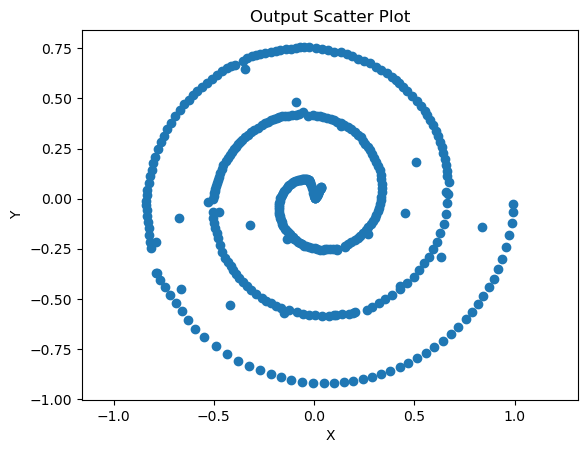

In [4]:
input_data = torch.linspace(0, 1, 400).view(-1, 1,1)

# Pass the input through the model
output_data = G_A(input_data)

# Extract the x and y values from the output
x_values = output_data[:, 0].detach().numpy()
y_values = output_data[:, 1].detach().numpy()

# Plot the scatter plot
plt.scatter(x_values, y_values)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Output Scatter Plot')
plt.axis('equal')
plt.show()

In [5]:
import os
import numpy as np

dir = 'results/involute/'
if not os.path.exists(dir):
    # Create the directory if it doesn't exist
    os.makedirs(dir)

input_data = torch.rand(10000).view(-1, 1, 1)

# Pass the input through the model
output_data = G_A(input_data)
output_data = output_data.view(-1, 2)
noisy_data = output_data + torch.randn(output_data.size()) * 0.01
noisy_data = noisy_data.detach().numpy()
output_data = output_data.detach().numpy()
np.savetxt(dir+'data_out.csv', output_data, delimiter=',')
np.savetxt(dir+'data_noise.csv', noisy_data, delimiter=',')
